# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
# Primeiro analisei os dados da variavel 'munReslat'
sinasc_raw['munResLat'].value_counts().sort_values(ascending=True)

-11.42684      32
-13.47656      40
-11.82571      43
-12.17983      44
-9.70554       50
-11.91439      54
-10.93217      64
-10.33887      75
-13.49976      80
-10.43105      81
-11.19624      84
-9.85139       93
-10.24873      97
-11.70974      98
-11.90842      99
-10.91553     104
-9.19187      109
-10.61207     112
-12.99752     127
-12.13178     154
-12.55684     162
-11.04561     164
-10.56842     166
-11.76712     168
-11.12855     170
-10.26310     199
-9.37819      205
-11.34413     205
-13.13056     214
-9.71667      226
-12.43601     233
-13.19503     237
-11.72133     261
-12.06380     303
-11.17321     304
-8.78502      337
-11.69949     353
-11.93554     367
-10.41177     432
-11.52855     450
-9.42556      500
-10.20981     583
-11.67754     616
-10.72357     631
-10.77388     781
-10.43595     881
-11.72226     927
-11.43387    1374
-12.74137    1590
-9.90846     1729
-10.88205    2182
-8.76889     8437
Name: munResLat, dtype: int64

In [6]:
# Utilizei o metodo CUT para separar os dados da altitude uma acima e outra abaixo de -10.5
latitude = pd.cut(sinasc_raw['munResLat'],[-14,-10.5,0])
latitude.sort_values()

0        (-14.0, -10.5]
15408    (-14.0, -10.5]
15409    (-14.0, -10.5]
15410    (-14.0, -10.5]
15411    (-14.0, -10.5]
              ...      
4332       (-10.5, 0.0]
8133       (-10.5, 0.0]
8122       (-10.5, 0.0]
8904       (-10.5, 0.0]
1863                NaN
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-14.0, -10.5] < (-10.5, 0.0]]

In [7]:
# Selecionei duas variaveis numericas para analise: peso e semana gestacional
sinasc_1 = sinasc_raw[['PESO', 'SEMAGESTAC']]

In [8]:
# operações de soma, media, minimo, maximo, mediana, desvio padrao
sinasc_1.groupby(latitude).agg({'PESO':['sum', 'mean', 'min', 'max', 'median','std'], 'SEMAGESTAC':['sum', 'mean', 'min', 'max', 'median','std']})

PESO                                              \
                     sum         mean  min   max  median         std   
munResLat                                                              
(-14.0, -10.5]  42098594  3240.098053  258  5985  3270.0  531.815114   
(-10.5, 0.0]    45555148  3246.055864  295  5190  3275.0  556.487709   

               SEMAGESTAC                                          
                      sum       mean   min   max median       std  
munResLat                                                          
(-14.0, -10.5]   482665.0  38.545360  19.0  45.0   39.0  2.012435  
(-10.5, 0.0]     511951.0  38.588302  21.0  45.0   39.0  2.020722

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:
sinasc_raw['munResArea'].sort_values(ascending=False)

6287     34096.394
6919     34096.394
6941     34096.394
6942     34096.394
6943     34096.394
           ...    
19290      459.978
19205      459.978
19293      459.978
5469       459.978
1863           NaN
Name: munResArea, Length: 27028, dtype: float64

In [10]:
#Criei 2 faixas de area dos municipios sendo uma acima e outra abaixo de 3000
area_mun = pd.cut(sinasc_raw['munResArea'],[0,3000,35000])
area_mun.sort_values()

27027        (0.0, 3000.0]
19314        (0.0, 3000.0]
19316        (0.0, 3000.0]
19318        (0.0, 3000.0]
19319        (0.0, 3000.0]
               ...        
9786     (3000.0, 35000.0]
9785     (3000.0, 35000.0]
9794     (3000.0, 35000.0]
13514    (3000.0, 35000.0]
1863                   NaN
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(0, 3000] < (3000, 35000]]

In [11]:
# Selecionei duas variaveis numericas para analise: APGAR1 e APGAR5
sinasc_2 = sinasc_raw[['APGAR1', 'APGAR5']]

In [12]:
# operações de soma, media, minimo, maximo, mediana, desvio padrao
sinasc_2.groupby(area_mun).agg({'APGAR1':['sum', 'mean', 'min', 'max', 'median','std'], 'APGAR5':['sum', 'mean', 'min', 'max', 'median','std']})

APGAR1                                          APGAR5  \
                    sum      mean  min   max median       std       sum   
munResArea                                                                
(0, 3000]       42070.0  8.073306  0.0  10.0    8.0  1.008790   47560.0   
(3000, 35000]  177079.0  8.152808  0.0  10.0    8.0  0.978517  199579.0   

                                                     
                   mean  min   max median       std  
munResArea                                           
(0, 3000]      9.130351  0.0  10.0    9.0  0.801124  
(3000, 35000]  9.190836  0.0  10.0    9.0  0.787591

In [13]:
# Selecionei outras duas variaveis numericas para analise: CONSPRENAT e CONSULTAS
sinasc_3 = sinasc_raw[['CONSPRENAT', 'CONSULTAS']]
sinasc_3.groupby(area_mun).agg({'CONSPRENAT':['sum', 'mean', 'min', 'max', 'median','std'], 'CONSULTAS':['sum', 'mean', 'min', 'max', 'median','std']})

CONSPRENAT                                       CONSULTAS  \
                     sum      mean  min   max median       std       sum   
munResArea                                                                 
(0, 3000]        44775.0  8.709395  0.0  99.0    8.0  4.290017     19520   
(3000, 35000]   170662.0  8.143825  0.0  99.0    8.0  5.325530     77142   

                                                  
                   mean min max median       std  
munResArea                                        
(0, 3000]      3.740180   1   9    4.0  0.607492  
(3000, 35000]  3.537326   1   9    4.0  0.820967

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
sinasc_raw['munResAlt'].sort_values(ascending=False)

12390    595.0
12196    595.0
12182    595.0
12184    595.0
12185    595.0
         ...  
20295     85.0
14979     85.0
20904     85.0
23218     85.0
1863       NaN
Name: munResAlt, Length: 27028, dtype: float64

In [15]:
# Utilizei o metodo qcut para dividir os dados em 2 partes
mun_alt = pd.qcut(sinasc_raw['munResAlt'],2)
mun_alt.sort_values()

8910     (84.999, 153.0]
10110    (84.999, 153.0]
10111    (84.999, 153.0]
10112    (84.999, 153.0]
10113    (84.999, 153.0]
              ...       
12489     (153.0, 595.0]
12488     (153.0, 595.0]
12494     (153.0, 595.0]
27027     (153.0, 595.0]
1863                 NaN
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(84.999, 153.0] < (153.0, 595.0]]

In [16]:
# Selecionei duas variaveis numericas para analise: APGAR1 e APGAR5
sinasc_4 = sinasc_raw[['QTDFILVIVO', 'QTDFILMORT']]

In [17]:
# operações de soma, media, minimo, maximo, mediana, desvio padrao
sinasc_4.groupby(mun_alt).agg({'QTDFILVIVO':['sum', 'mean', 'min', 'max', 'median','std'], 'QTDFILMORT':['sum', 'mean', 'min', 'max', 'median','std']})

QTDFILVIVO                                       QTDFILMORT  \
                       sum      mean  min   max median       std        sum   
munResAlt                                                                     
(84.999, 153.0]    14406.0  1.182079  0.0  14.0    1.0  1.268260     3520.0   
(153.0, 595.0]     12420.0  0.936157  0.0  30.0    1.0  1.060187     3123.0   

                                                       
                     mean  min   max median       std  
munResAlt                                              
(84.999, 153.0]  0.300393  0.0   9.0    0.0  0.641421  
(153.0, 595.0]   0.236394  0.0  28.0    0.0  0.586806

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [18]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [19]:
# Criei um dataframe filtrando apenas os dados de analise
sinasc_5 = sinasc_raw[['IDADEMAE','munResNome']]

In [20]:
# Defini a variavel 'munResNome' como index
sinasc_5 = sinasc_5.set_index('munResNome')

Text(0, 0.5, 'Idade Media das Maes')

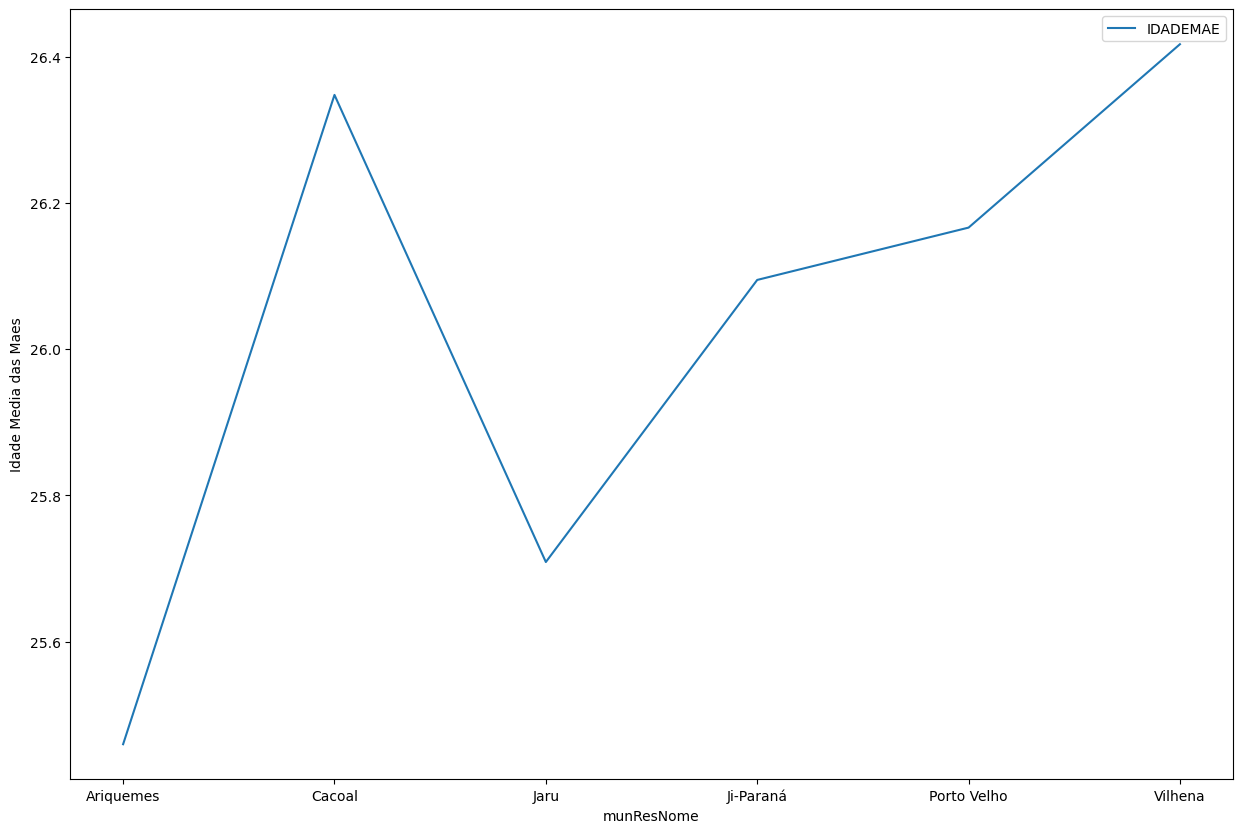

In [21]:
# Agrupei os municipios substituindo pelas regioes imediatas e calculei a media da idade das maes
sinasc_5.groupby(imediatas).mean().plot(figsize=[15,10]);
plt.ylabel('Idade Media das Maes')

Podemos observar nesse grafico que a idade media das maes das Regioes Cacoal e Vilhena é mais alta que das regioes Ariquemes e Jaru.

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [22]:

sinasc_6 = sinasc_raw[['IDADEMAE', 'IDADEPAI','CONSULTAS','munResNome','QTDGESTANT']]
sinasc_6 = sinasc_6.set_index('munResNome')
mapping_1 = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    "Cerejeiras": "IDH-M alto",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão d'Oeste": "IDH-M médio",
    "Santa Luzia d'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari": "IDH-M médio",
    "São Felipe d'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada d'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia d'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta d'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho d'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

In [23]:
sinasc_6.groupby(mapping_1).mean()

,IDADEMAE,IDADEPAI,CONSULTAS,QTDGESTANT
munResNome,,,,
IDH-M alto,26.293646,31.083188,3.529487,1.277397
IDH-M baixo,25.269231,30.402332,3.632730,1.225211
IDH-M médio,25.798741,31.566446,3.660722,1.308128


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [24]:
mapping_2 = {
    "Ariquemes": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Porto Velho": "Desenvolvimento moderado",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Cacoal": "Desenvolvimento moderado",
    "Santa Luzia d'Oeste": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    'Pimenteiras do Oeste': "Desenvolvimento moderado",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    'Primavera de Rondônia': "Desenvolvimento moderado",
    "Alta Floresta d'Oeste": "Desenvolvimento moderado",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "São Felipe d'Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "Cerejeiras": "Desenvolvimento moderado",
    "Monte Negro": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Espigão d'Oeste": "Desenvolvimento regular",
    "Seringueiras": "Desenvolvimento regular",
    "Alvorada d'Oeste": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Cabixi": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Nova Brasilândia d'Oeste": "Desenvolvimento regular",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Corumbiara": "Desenvolvimento regular",
    "Alto Paraíso": "Desenvolvimento regular",
    "Cacaulândia": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Mirante da Serra": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Machadinho d'Oeste": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Governador Jorge Teixeira": "Desenvolvimento regular"
}
    

In [25]:
sinasc_6.groupby(mapping_2).sum()

,IDADEMAE,IDADEPAI,CONSULTAS,QTDGESTANT
munResNome,,,,
Desenvolvimento moderado,561938,179957.0,76542,25611.0
Desenvolvimento regular,93135,25327.0,13029,5044.0


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [26]:
mapping_pib = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    'Jaru': "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [27]:
sinasc_6.groupby(mapping_pib).mean()

,IDADEMAE,IDADEPAI,CONSULTAS,QTDGESTANT
munResNome,,,,
Acima de 1 Bilhão,26.265562,31.108387,3.541103,1.268052
Acima de 100 Milhões,25.638424,31.744348,3.747437,1.233388
Acima de 200 Milhões,25.146435,30.187500,3.689788,1.145669
Acima de 300 Milhões,25.706070,30.819149,3.737220,1.262651
Acima de 500 Milhões,25.785927,31.381955,3.525939,1.429716
Até 100 Milhões,26.519894,31.626126,3.718833,1.171123


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Descobri que a quantidade de gravidez e de consultas realizadas em Municipios de Desenvolvimento Moderado foi mais que 5x maior que em Municipios de Desenvolvimento regular

- Em municipios de IDH-M mais alto, a idade média da mae é maior que IDH-M mais baixo ou médio.